In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')

In [28]:
publisher_counts = df['publisher'].value_counts().head(5).sort_values(ascending=False)

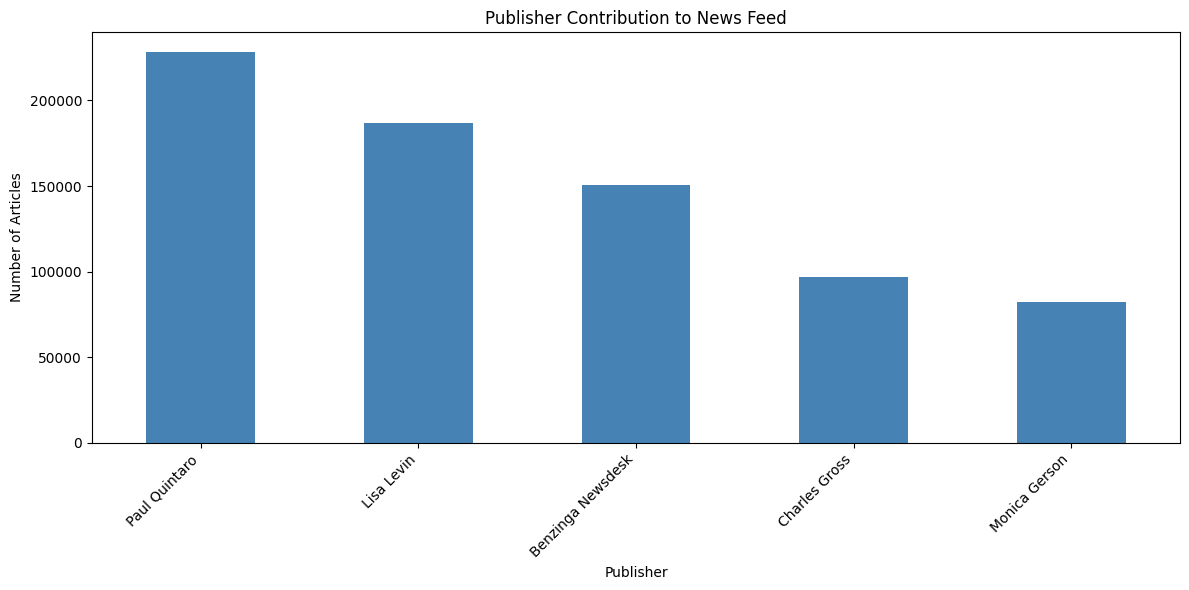

In [29]:
plt.figure(figsize=(12, 6))
ax = publisher_counts.plot(kind='bar', color='steelblue')
ax.set_xlabel('Publisher')
ax.set_ylabel('Number of Articles')
ax.set_title('Publisher Contribution to News Feed')
ax.set_xticklabels(publisher_counts.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
top_publishers = publisher_counts.head(5).index
subset_data = df[df['publisher'].isin(top_publishers)]

In [19]:
for publisher in top_publishers:
    publisher_data = subset_data[subset_data['publisher'] == publisher]
    print(publisher_data)

         Unnamed: 0                                           headline  \
209             209  Agilent Reports Purchase Of Genohm, No Terms D...   
212             212  UPDATE: Alnylam, Agilent Deal Has Initial Term...   
213             213  Alnylam Pharma 8-K Shows Co. Entered Manufactu...   
225             225  Agilent Reports Purchase Of Luxcel Biosciences...   
233             233  Agilent Sees Q1 Adj. EPS $0.55-$0.57 vs $0.60 ...   
...             ...                                                ...   
1407290     1413811  China Zenix Auto Int'l Reports Q2 Loss $0.01, ...   
1407293     1413814  China Zenix Auto Q1 EPS $0.00, Revenue $116.5M...   
1407304     1413825  China Zenix Auto International Limited Reports...   
1407311     1413832  China Zenix Auto Shares Halted on NYSE Just Fo...   
1407313     1413834  China Zenix Auto International Limited Reports...   

                                                       url      publisher  \
209      https://www.benzinga.com/

In [20]:
import re

In [22]:
def extract_domain(email):
    match = re.search("@[\w.]+", email)
    if match:
        return match.group()[1:]
    else:
        return None

In [23]:
df['domain'] = df['publisher'].apply(extract_domain)
domain_counts = df['domain'].value_counts()

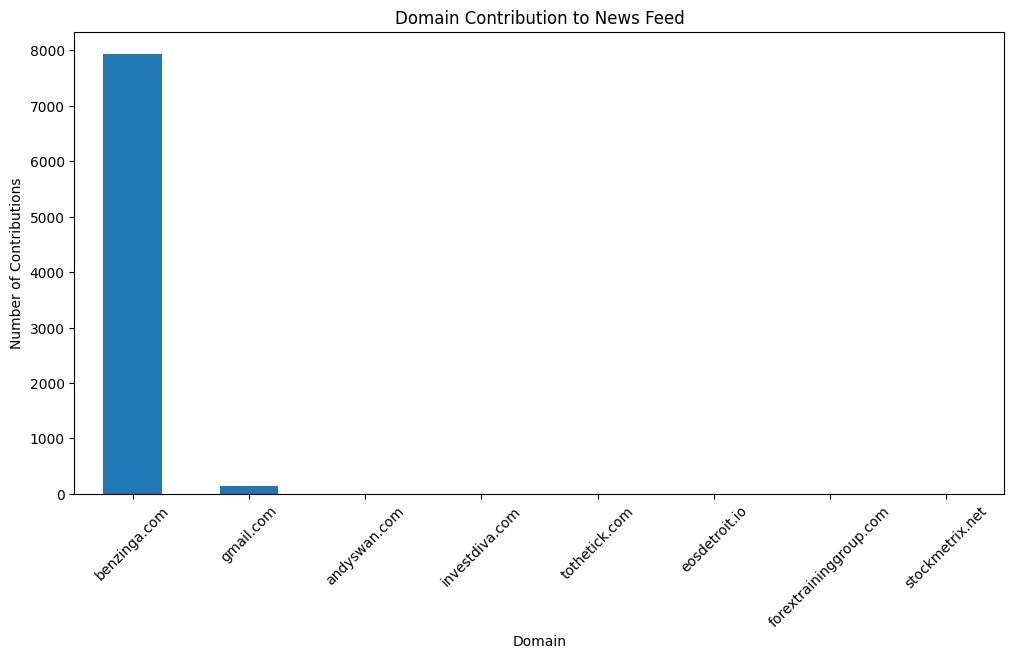

In [24]:
plt.figure(figsize=(12, 6))
domain_counts.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Number of Contributions')
plt.title('Domain Contribution to News Feed')
plt.xticks(rotation=45)
plt.show()